In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from scipy import stats
from scipy.signal import hilbert
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [59]:
def scale_plot_size(factor=3.0):
    default_figsize = mpl.rcParamsDefault['figure.figsize']
    mpl.rcParams['figure.figsize'] = [val*factor for val in default_figsize]
scale_plot_size(1.5)

def normalizeDataFrame(df):
    maxValue = df.max(axis = 0)
    minValue = df.min(axis = 0)
    diff = maxValue-minValue
    mean = df.mean(axis = 0)
    ndf = (df-mean)/diff
    return ndf

def rms(df):
    return np.sqrt(df.dot(df)/df.size)

def percentageAccuracy(predicted,output):
    per = ((predicted - output)/output)*100
    per = np.absolute(per)
    avg = np.sum(per)/output.shape[0]
    return per,avg

t = np.arange (1,2795,dtype=np.float64)
prevt = np.arange (0,2794,dtype=np.float64)

output = np.arange (2793,-1,-1,dtype=np.float64) # for dense
output = np.reshape(output,(2794,1)) # for dense

rpm1_1 = np.full((2794,1),1800)
tor1_1 = np.full((2794,1),4000)
# output = np.arange (7175679,-1,-1,dtype=np.float64)
# output = np.reshape(output,(7175680,1))
print (rpm1_1.shape)
print (tor1_1.shape)

(2794, 1)
(2794, 1)


In [1]:
# training_set_path = os.path.expanduser('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1')
training_set_path = os.path.expanduser('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_2')

header = ["Hr", "Min","Sec","uSec", "X","Y"]

print (training_set_path)

dirList = os.listdir(os.path.expanduser(training_set_path))
dirList.sort()
n = 0


for sets in dirList: 
    if sets == 'temp_00001.csv':
        break
    df = pd.read_csv(training_set_path+"/"+sets, header=None)
    df.columns = header
    data = np.array(df,np.float64)
    columnx = data[:,4]
    columny = data[:,5]
    
    if n==0 :
        x = columnx
        y = columny

        kurtx = stats.kurtosis(columnx)
        kurty = stats.kurtosis(columny)

        rmsx = rms(columnx)
        rmsy = rms(columny)
        
        n = 1
    else:
        x= np.append(x,columnx)
        y= np.append(y,columny)

        kurtx = np.append(kurtx,stats.kurtosis(columnx))
        kurty = np.append(kurty,stats.kurtosis(columny))

        rmsx = np.append(rmsx,rms(columnx))
        rmsy = np.append(rmsy,rms(columny))

NameError: name 'os' is not defined

In [61]:
#t
# xdf = pd.DataFrame(x)
# ydf = pd.DataFrame(y)

xdfkurt = pd.DataFrame(kurtx)
ydfkurt = pd.DataFrame(kurty)

xdfrms = pd.DataFrame(rmsx)
ydfrms = pd.DataFrame(rmsy)



# xdf.to_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/x.csv')
# ydf.to_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/y.csv')

# xdfkurt.to_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/kurtx.csv')
# ydfkurt.to_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/kurty.csv')
xdfkurt.to_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_2_processed/kurtx.csv')
ydfkurt.to_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_2_processed/kurty.csv')

                
# xdfrms.to_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/rmsx.csv')
# ydfrms.to_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/rmsy.csv')
xdfrms.to_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_2_processed/rmsx.csv')
ydfrms.to_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_2_processed/rmsy.csv')


In [63]:
############## reading from csv files #############
header = ["0","1"]
# xdf = pd.read_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/x.csv')
# ydf = pd.read_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/y.csv')

# xdfkurt = pd.read_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/kurtx.csv')
# ydfkurt = pd.read_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/kurty.csv')
# xdfrms = pd.read_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/rmsx.csv')
# ydfrms = pd.read_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_1_processed/rmsy.csv')
xdfkurt = pd.read_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_2_processed/kurtx.csv')
ydfkurt = pd.read_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_2_processed/kurty.csv')
xdfrms = pd.read_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_2_processed/rmsx.csv')
ydfrms = pd.read_csv ('~/Vibrational_analysis/data/IEEE_dataset/Learning_set/Bearing1_2_processed/rmsy.csv')

# xdf.columns = header
# ydf.columns = header
xdfkurt.columns = header
ydfkurt.columns = header
xdfrms.columns = header
ydfrms.columns = header

# xdf = xdf.loc[:,'1']
# ydf = ydf.loc[:,'1']
xdfkurt = xdfkurt.loc[:,'1']
ydfkurt = ydfkurt.loc[:,'1']
xdfrms = xdfrms.loc[:,'1']
ydfrms = ydfrms.loc[:,'1']

############ calculating rolling mean #############
# xdf = xdf.rolling(10).mean()
# ydf = ydf.rolling(10).mean()
xdfkurt = xdfkurt.rolling(10).mean()
ydfkurt = ydfkurt.rolling(10).mean()
xdfrms = xdfrms.rolling(10).mean()
ydfrms = ydfrms.rolling(10).mean()

#converting dataframe to np array
# x = np.array(xdf,np.float64)
# y = np.array(xdf,np.float64)
kurtx = np.array(xdfkurtnm,np.float64)
kurty = np.array(ydfkurtnm,np.float64)
rmsx = np.array(xdfrmsnm,np.float64)
rmsy = np.array(xdfrmsnm,np.float64)
kurtx = kurtx [9:]
kurty = kurty [9:]
rmsx = rmsx [9:]
rmsy = rmsy [9:]

############ calculating previous values###########
#t-1
#removing first element
# prevx = x [1:]
# prevy = y [1:]
# prevkurtx = kurtx [1:]
# prevkurty = kurty [1:]
# prevrmsx = rmsx [1:]
# prevrmsy = rmsy [1:]

#appending above matrix to zero
# prevx = np.append([0],prevx)
# prevy = np.append([0],prevy)
# prevkurtx = np.append([0],prevkurtx)
# prevkurty = np.append([0],prevkurty)
# prevrmsx = np.append([0],prevrmsx)
# prevrmsy = np.append([0],prevrmsy)

In [65]:
# X = np.vstack ((t,prevt,kurtx,prevkurtx,rmsx,prevrmsx))
# Y = np.vstack ((t,prevt,kurty,prevkurty,rmsy,prevrmsy))

X = np.vstack ((kurtx,kurty,rmsx,rmsy))
Xnm = preprocessing.normalize(X)
Xnm = np.vstack ((Xnm,))

# X = np.append (kurtx,prevkurtx,axis=0)
# X = np.append (prevkurtx,rmsx,prevrmsx,axis=0)
Xnm = Xnm.transpose()
# Y = Y.transpose()
print (output.shape)
print (Xnm.shape)

# split data
X_train, X_test, output_train, output_test = train_test_split(Xnm, output, test_size=0.2, random_state=69)
print (output_test.shape)
print (output_train.shape)
print (X_train.shape)
print (X_test.shape)

(2794, 1)
(2794, 4)
(559, 1)
(2235, 1)
(2235, 4)
(559, 4)


In [53]:
#create model dense
pred = Sequential()
pred.add(Dense(30,input_dim = 4,init = 'normal',activation = 'relu'))
pred.add(Dropout(0.5))
pred.add(Dense(20, init = 'normal',activation = 'relu'))
pred.add(Dropout(0.5))
pred.add(Dense(1))

#create model LSTM
# look_back = 1
# pred = Sequential()
# pred.add(LSTM(2, input_shape=(1,look_back)))
# pred.add(Dense(1))


#compile model
pred.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics=['mse']) # for dense
# pred.compile(loss='mean_squared_error', optimizer='adam') #for LSTM

pred.fit(X_train,output_train,epochs = 500,validation_split = 0.2,batch_size = 32,verbose =1) # for dense
# x = np.reshape(x,(7175680,1))

# xReshape = np.reshape(x,(x.shape[0],1,x.shape[1]))
# pred.fit(xReshape, output, epochs=10, batch_size=25000, verbose=1) # for LSTM
predicted = pred.predict(X_test)

# scores = pred.evaluate(X_test,output_test) # for dense
# scores = pred.evaluate(x,output) # for LSTM

# print ("\n%s: %.2f%%" % (pred.metrics_names[1],scores[1]*100))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, input_dim=4, kernel_initializer="normal", activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, kernel_initializer="normal", activation="relu")`
  """


Train on 1788 samples, validate on 447 samples
Epoch 1/400
1788/1788 [==============================] - 1s 365us/step - loss: 2624995.4195 - mean_squared_error: 2624995.4195 - val_loss: 2567317.1885 - val_mean_squared_error: 2567317.1885
Epoch 2/400
1788/1788 [==============================] - 0s 57us/step - loss: 2622613.1661 - mean_squared_error: 2622613.1661 - val_loss: 2563066.3322 - val_mean_squared_error: 2563066.3322
Epoch 3/400
1788/1788 [==============================] - 0s 57us/step - loss: 2614846.2740 - mean_squared_error: 2614846.2740 - val_loss: 2551448.7830 - val_mean_squared_error: 2551448.7830
Epoch 4/400
1788/1788 [==============================] - 0s 53us/step - loss: 2598273.7601 - mean_squared_error: 2598273.7601 - val_loss: 2527678.6544 - val_mean_squared_error: 2527678.6544
Epoch 5/400
1788/1788 [==============================] - 0s 60us/step - loss: 2564931.1700 - mean_squared_error: 2564931.1700 - val_loss: 2486330.3568 - val_mean_squared_error: 2486330.3568
Ep

Epoch 88/400
1788/1788 [==============================] - 0s 45us/step - loss: 526301.4167 - mean_squared_error: 526301.4167 - val_loss: 213527.8477 - val_mean_squared_error: 213527.8477
Epoch 89/400
1788/1788 [==============================] - 0s 49us/step - loss: 496688.1341 - mean_squared_error: 496688.1341 - val_loss: 209494.9918 - val_mean_squared_error: 209494.9918
Epoch 90/400
1788/1788 [==============================] - 0s 49us/step - loss: 566200.2799 - mean_squared_error: 566200.2799 - val_loss: 207924.6556 - val_mean_squared_error: 207924.6556
Epoch 91/400
1788/1788 [==============================] - 0s 46us/step - loss: 544702.0223 - mean_squared_error: 544702.0223 - val_loss: 209964.9760 - val_mean_squared_error: 209964.9760
Epoch 92/400
1788/1788 [==============================] - 0s 46us/step - loss: 561330.5639 - mean_squared_error: 561330.5639 - val_loss: 209813.7161 - val_mean_squared_error: 209813.7161
Epoch 93/400
1788/1788 [==============================] - 0s 43us

Epoch 132/400
1788/1788 [==============================] - 0s 43us/step - loss: 510027.1716 - mean_squared_error: 510027.1716 - val_loss: 200590.7515 - val_mean_squared_error: 200590.7515
Epoch 133/400
1788/1788 [==============================] - 0s 43us/step - loss: 520269.2787 - mean_squared_error: 520269.2787 - val_loss: 195801.3094 - val_mean_squared_error: 195801.3094
Epoch 134/400
1788/1788 [==============================] - 0s 44us/step - loss: 498158.8740 - mean_squared_error: 498158.8740 - val_loss: 190749.2419 - val_mean_squared_error: 190749.2419
Epoch 135/400
1788/1788 [==============================] - 0s 45us/step - loss: 531963.4232 - mean_squared_error: 531963.4232 - val_loss: 195341.5701 - val_mean_squared_error: 195341.5701
Epoch 136/400
1788/1788 [==============================] - 0s 46us/step - loss: 510864.9034 - mean_squared_error: 510864.9034 - val_loss: 197937.9326 - val_mean_squared_error: 197937.9326
Epoch 137/400
1788/1788 [==============================] - 0

Epoch 219/400
1788/1788 [==============================] - 0s 43us/step - loss: 529252.7185 - mean_squared_error: 529252.7185 - val_loss: 186379.4830 - val_mean_squared_error: 186379.4830
Epoch 220/400
1788/1788 [==============================] - 0s 43us/step - loss: 529847.7730 - mean_squared_error: 529847.7730 - val_loss: 185221.2896 - val_mean_squared_error: 185221.2896
Epoch 221/400
1788/1788 [==============================] - 0s 44us/step - loss: 504510.3881 - mean_squared_error: 504510.3881 - val_loss: 187305.9476 - val_mean_squared_error: 187305.9476
Epoch 222/400
1788/1788 [==============================] - 0s 44us/step - loss: 510790.7736 - mean_squared_error: 510790.7736 - val_loss: 184879.1935 - val_mean_squared_error: 184879.1935
Epoch 223/400
1788/1788 [==============================] - 0s 44us/step - loss: 474368.5754 - mean_squared_error: 474368.5754 - val_loss: 176683.3675 - val_mean_squared_error: 176683.3675
Epoch 224/400
1788/1788 [==============================] - 0

Epoch 306/400
1788/1788 [==============================] - 0s 44us/step - loss: 487724.6674 - mean_squared_error: 487724.6674 - val_loss: 164465.3998 - val_mean_squared_error: 164465.3998
Epoch 307/400
1788/1788 [==============================] - 0s 43us/step - loss: 508023.5706 - mean_squared_error: 508023.5706 - val_loss: 167662.2175 - val_mean_squared_error: 167662.2175
Epoch 308/400
1788/1788 [==============================] - 0s 44us/step - loss: 514393.2782 - mean_squared_error: 514393.2782 - val_loss: 164332.0469 - val_mean_squared_error: 164332.0469
Epoch 309/400
1788/1788 [==============================] - 0s 44us/step - loss: 520132.8205 - mean_squared_error: 520132.8205 - val_loss: 167741.6772 - val_mean_squared_error: 167741.6772
Epoch 310/400
1788/1788 [==============================] - 0s 45us/step - loss: 498972.3951 - mean_squared_error: 498972.3951 - val_loss: 173565.9873 - val_mean_squared_error: 173565.9873
Epoch 311/400
1788/1788 [==============================] - 0

Epoch 393/400
1788/1788 [==============================] - 0s 44us/step - loss: 502964.9786 - mean_squared_error: 502964.9786 - val_loss: 156754.0575 - val_mean_squared_error: 156754.0575
Epoch 394/400
1788/1788 [==============================] - 0s 46us/step - loss: 488486.5277 - mean_squared_error: 488486.5277 - val_loss: 159019.1447 - val_mean_squared_error: 159019.1447
Epoch 395/400
1788/1788 [==============================] - 0s 43us/step - loss: 487009.9705 - mean_squared_error: 487009.9705 - val_loss: 160668.5978 - val_mean_squared_error: 160668.5978
Epoch 396/400
1788/1788 [==============================] - 0s 43us/step - loss: 498497.1322 - mean_squared_error: 498497.1322 - val_loss: 164787.7094 - val_mean_squared_error: 164787.7094
Epoch 397/400
1788/1788 [==============================] - 0s 44us/step - loss: 473975.8188 - mean_squared_error: 473975.8188 - val_loss: 170313.6306 - val_mean_squared_error: 170313.6306
Epoch 398/400
1788/1788 [==============================] - 0

15.8209839501


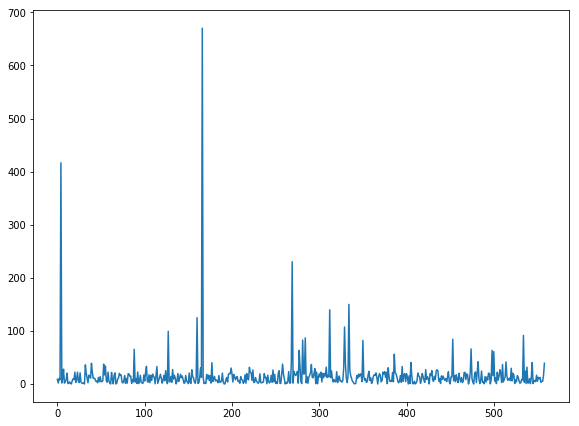

In [50]:
percentage,average = percentageAccuracy(predicted,output_test)
print (average)
plt.plot(percentage)
# print (percentage.max)
# print (percentage.min)